In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#for reset the numbers
np.random.seed(88)

In [3]:
def get_training_examples():
    X1 = np.array([[8, 7], [4, 10], [9, 7], [7, 10], [9, 6], [4, 8], [10, 10]])
    y1 = np.ones(len(X1))
    X2 = np.array([[2, 7], [8, 3], [7, 5], [4, 4],  [4, 6], [1, 3], [2, 5]])
    y2 = np.ones(len(X2)) * -1
    return X1, y1, X2, y2

In [4]:
X1, y1, X2, y2= get_training_examples()
X = np.vstack((X1, X2))#vertically 
y = np.hstack((y1, y2))#horizontally

In [6]:
for ix,iy in zip(X,y):
    print(ix[0],',',ix[1] ,',',iy)

8 , 7 , 1.0
4 , 10 , 1.0
9 , 7 , 1.0
7 , 10 , 1.0
9 , 6 , 1.0
4 , 8 , 1.0
10 , 10 , 1.0
2 , 7 , -1.0
8 , 3 , -1.0
7 , 5 , -1.0
4 , 4 , -1.0
4 , 6 , -1.0
1 , 3 , -1.0
2 , 5 , -1.0


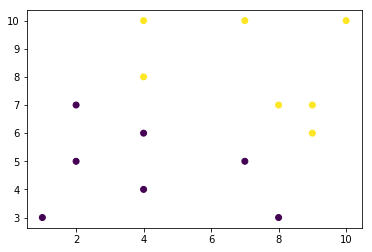

In [7]:
plt.scatter(X[:,0],X[:,1],marker='o', c=y) 
plt.show()

In [8]:
# add a column with value 1 at the first position.
Xa= np.c_[np.ones(X.shape[0]), X]
print(Xa)

[[ 1.  8.  7.]
 [ 1.  4. 10.]
 [ 1.  9.  7.]
 [ 1.  7. 10.]
 [ 1.  9.  6.]
 [ 1.  4.  8.]
 [ 1. 10. 10.]
 [ 1.  2.  7.]
 [ 1.  8.  3.]
 [ 1.  7.  5.]
 [ 1.  4.  4.]
 [ 1.  4.  6.]
 [ 1.  1.  3.]
 [ 1.  2.  5.]]


In [9]:
#calculate weighted sum
def linear_regression(x,w):
    val=0
    for ix,iy in zip(x,w):
        val+=ix*iy
    return val
    

In [10]:
#decide -1 or 1
def activate(val):
    return np.sign(val)

In [11]:
def predict(X, w):
    hp=[]
    for x in X: 
        lr=linear_regression(x,w)
        h=activate(lr)
        hp.append(h)
    return hp

In [12]:
w = np.random.rand(3)
print(w)
py=predict(Xa,w)
print(py)

[0.64755105 0.50714969 0.52834138]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [13]:
def get_miss_indexes(py, y):
    miss=[]
    for i in range(len(y)):
        if py[i]!=y[i]:
            miss.append(i)
    return miss

In [14]:
miss=get_miss_indexes(py,y)
print(miss)
print('total miss classification=', len(miss), 'total=',len(y))

[7, 8, 9, 10, 11, 12, 13]
total miss classification= 7 total= 14


In [15]:
rnd=np.random.choice(miss)
print(rnd)
rx=Xa[rnd]#Xa er random 
ry=y[rnd]#y er random
print(rx)
print(ry)

12
[1. 1. 3.]
-1.0


In [16]:
def perceptron_train(X, y):
    w = np.random.rand(3)
    py=predict(X,w)
    miss=get_miss_indexes(py,y) 
    while len(miss)>0:
        rnd=np.random.choice(miss)
        rx=X[rnd]
        ry=y[rnd]
        w=w+rx*ry
        
        py=predict(X,w)
        miss=get_miss_indexes(py,y)
        
    return w

In [17]:
w=perceptron_train(Xa,y)
print(w)

[-63.27777635   3.23140505   7.13012829]


In [18]:
py=predict(Xa,w)
print(py)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


In [19]:
xt=[1,5,4]
predict([xt],w)

[-1.0]